# Modelo de regresion logistica para deteccion de enfermedades cardiacas

## Importación de librerías

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [9]:
# Creacion de variable donde se cargara el dataset "Heart Disease Cleveland UCI"
enfermedadCardiaca = pd.read_csv('C:/Users/Jhon/Documents/UNAD/9_semestre/Analisis_de_datos/Tarea_3/heart_cleveland_upload.csv')

In [13]:
enfermedadCardiaca.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


## Análisis de variables del dataset para realizacion de analisis exploratorio

•	age: edad en años

•	sex: sexo (1 = masculino; 0 = femenino)

•	cp: tipo de dolor torácico

Valor 0: angina típica
Valor 1: angina atípica
Valor 2: dolor no anginoso
Valor 3: asintomático

•	trestbps: presión arterial en reposo (en mm Hg al ser admitido en el hospital)

•	chol: colesterol sérico en mg/dl

•	fbs: (glucosa en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

•	restecg: resultados del electrocardiograma en reposo

Valor 0: normal
Valor 1: con anormalidad en la onda ST-T (inversiones de la onda T y/o elevación o depresión del segmento ST de > 0.05 mV)
Valor 2: muestra probable o definida hipertrofia ventricular izquierda según los criterios de Estes

•	thalach: frecuencia cardíaca máxima alcanzada

•	exang: angina inducida por el ejercicio (1 = sí; 0 = no)

•	oldpeak: depresión del segmento ST inducida por ejercicio en relación al reposo

•	slope: pendiente del segmento ST durante el pico de ejercicio

Valor 0: pendiente ascendente
Valor 1: plana
Valor 2: pendiente descendente

•	ca: número de vasos principales (0-3) coloreados por fluoroscopía

•	thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible

•	condition (etiqueta): 0 = sin enfermedad, 1 = con enfermedad



In [18]:
# Descripcion para analisis de valores atipicos
enfermedadCardiaca.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Datos atipicos')

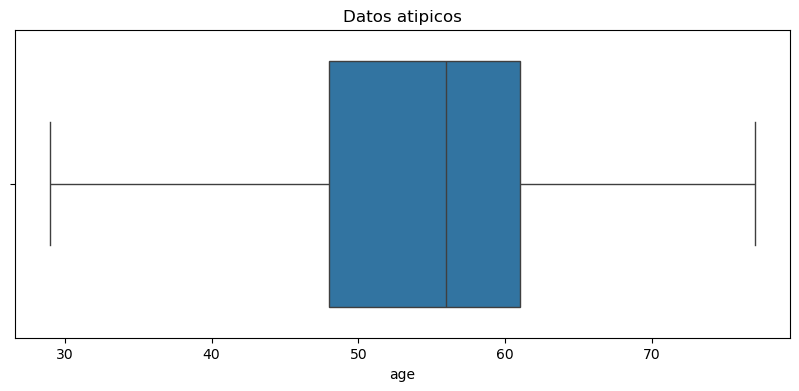

In [30]:
#Identificación de datos atipicos variable edad

plt.figure(figsize=(10, 4))
sns.boxplot(x=enfermedadCardiaca['age'])
plt.title('Datos atipicos', fontsize=12 )

### No se evidencian valores atipicos en la variable de edad.

Text(0.5, 1.0, 'Datos atipicos')

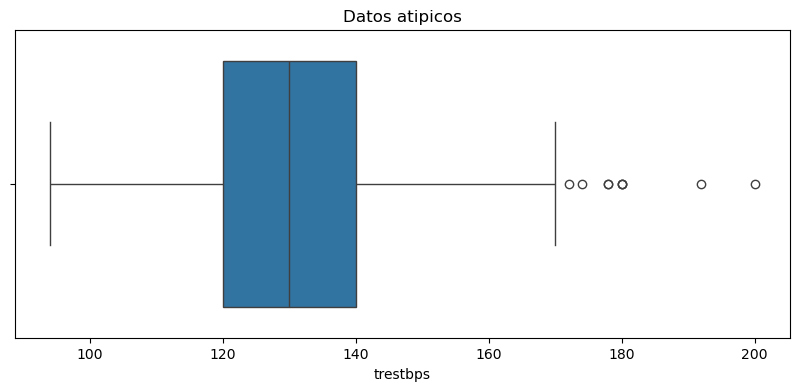

In [32]:
#Identificación de datos atipicos variable trestbps

plt.figure(figsize=(10, 4))
sns.boxplot(x=enfermedadCardiaca['trestbps'])
plt.title('Datos atipicos', fontsize=12 )

### En la variable trestbps, La cual significa presion arterial en reposo se evidencian valores atipicos superiores a 170 pero estos valores nos indican que en nuestro dataset existen personas con un valor superior 150 mm Hg y se encuentran sufriendo hipertensión y se encuentran en un alto riesgo de enfermedad cardica.

Text(0.5, 1.0, 'Datos atipicos')

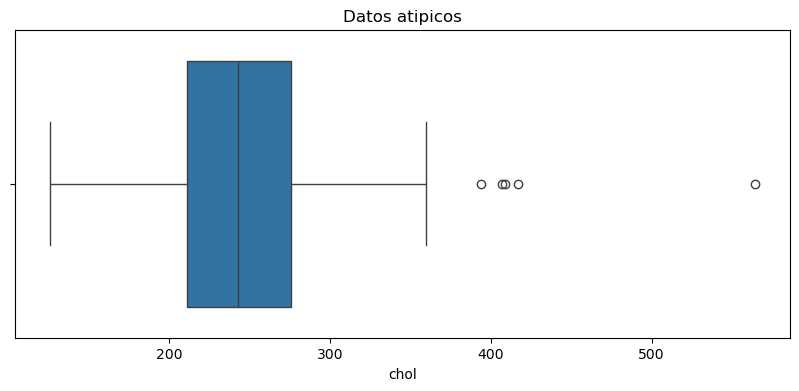

In [34]:
#Identificación de datos atipicos variable chol

plt.figure(figsize=(10, 4))
sns.boxplot(x=enfermedadCardiaca['chol'])
plt.title('Datos atipicos', fontsize=12 )

### En la variable chol la cual se refiere al colesterol serico en mg/dl nos indica que existen varias personas que se encuentran en valores superiores a 240 mg/dl esto significa que cuentan con alto riesgo de sufrir enfermedades cardiacas ademas de una persona que tiene 564 mg/dl  de acuerdo al valor maximo obtenido en la descripcion de la variable, significando una enfermedad cardíaca grave.

Text(0.5, 1.0, 'Datos atipicos')

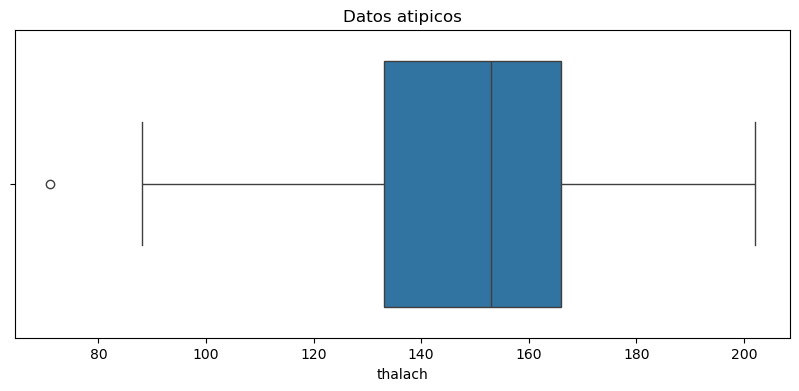

In [36]:
#Identificación de datos atipicos variable thalach

plt.figure(figsize=(10, 4))
sns.boxplot(x=enfermedadCardiaca['thalach'])
plt.title('Datos atipicos', fontsize=12 )

### En la variable Thalach la cual se refiere a la frecuencia cardíaca máxima alcanzada, solo se evidencia un dato atipico el cual se refiere a una frecuencia cardiaca maxima alcanzada de 71 si esta muestra se tomo cuando la persona se encontraba en reposo solamente nos indica un valor típico para adultos dado que estos varían entre 60 y 100 lpm, en realidad los valores tipicos hallados en la variable son los realmente atipicos dado que una frecuencia de 135 a 165 lpm sería anormalmente alta y podría indicar condiciones como taquicardia si la muestra fue tomada en reposo, en cambio si fue tomada durante ejercicio estos valores serian normales.
### El dataset no define si esta muestra fue tomada en reposo o durante ejercicio para este analisis lo tomare como que fue tomada durante actividad fisica.

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [38]:
print("Cantidad de Registros con cero en Edad: ",enfermedadCardiaca['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",enfermedadCardiaca['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol Sérico : ",enfermedadCardiaca['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardíaca Maxima : ",enfermedadCardiaca['thalach'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Colesterol Sérico :  0
Cantidad de Registros con cero en Frecuencia Cardíaca Maxima :  0


### Se evaluan las variables en las cuales no se debe evidenciar un valor de cero, dado que las demas variables tienen
### un valor asignado si el resultado es igual a cero.
### Se evidencia que no existen valores faltantes, por lo cual no es necesario transformar ningun valor.

In [44]:
# Analisis de los tipos de datos para la seleccion de datos para el modelo

enfermedadCardiaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [52]:
# Evaluacion de pacientes que actualmente tienen enfermedades cardiacas
# condition (etiqueta): 0 = sin enfermedad, 1 = con enfermedad
# Valor 0 (Normal): No se presentan signos de enfermedad cardíaca.
# Valor 1 (Defecto Fijo): Se presenta diagnóstico de enfermedad cardiaca, posibilidad de riesgos mayores o complicaciones de salud.

enfermedadCardiaca['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [56]:
# Porcentaje de datos para (train) = 80% y (test) = 20%
# Se crean variables X y Y para almacenar la información del entrenamiento

X = enfermedadCardiaca.drop('condition',axis=1) 
Y = enfermedadCardiaca['condition'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)

In [58]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
261   51    1   3       140   261    0        2      186      1      0.0   
121   51    0   2       140   308    0        2      142      0      1.5   
12    59    1   0       134   204    0        0      162      0      0.8   
141   44    1   2       120   226    0        0      169      0      0.0   
29    62    1   1       128   208    1        2      140      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
174   64    1   3       120   246    0        2       96      1      2.2   
294   35    1   3       120   198    0        0      130      1      1.6   
135   46    0   2       142   177    0        2      160      1      1.4   
252   53    1   3       123   282    0        0       95      1      2.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
261      0   0     0  
121      0   1     0  
12       0   2    

### Se evidencia 13 columnas dentro de la variable X_train, sin tomar en cuenta la variable condition la cual se refiere a personas con enfermedades cardiacas.

In [60]:
print (Y_train)

261    0
121    0
12     1
141    0
29     0
      ..
174    1
294    1
135    0
252    1
246    1
Name: condition, Length: 237, dtype: int64


### Se evidencia 1 columna dentro de la variable Y_train, la cual es la variable condition la cual se refiere a personas 
con enfermedades cardiacas.

## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [64]:
#Modelo que se aplicara de regresion logistica, haciendo uso de la libreria liblinear
regresion_enfermedad_cardiaca = LogisticRegression(solver = "liblinear")
regresion_enfermedad_cardiaca.fit (X_train , Y_train)   

# Creacion del modelo de prediccion
Prediccion = regresion_enfermedad_cardiaca.predict(X_test)

In [66]:
print (Prediccion)

[1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [70]:
#obtener los resultados de desempeño del modelo dee regresion
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

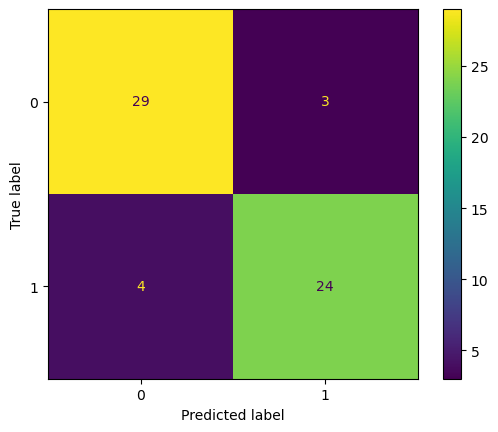

In [72]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

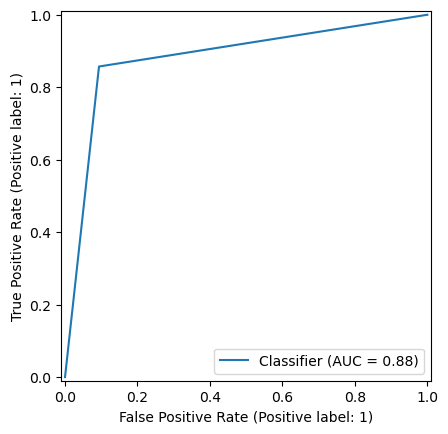

In [75]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos.

La evaluacion realizada al modelo de regresion logistica por medio del analisis de precisión, recall, F1-score

Precision: El modelo nos indica una precision del 0.88 en cuanto a casos sin enfermedad y 0.89 en cuanto a casos con enfermedad, esto nos indica que el entrenamiento del modelo haciendo uso del 80% de los datos cuenta con una alta capacidad de identificar correctamente los casos en los que una persona puede tener enfermedades cardiacas.

Recall: El recall nos indica que el modelo de regresion logistica identifico 91% de los casos sin enfermedad y el 86% de los casos con enfermedad, lo que nos indica que existieron unos pocos casos inferiores al 14% que no pudieron ser detectados por el modelo.

F1-Score: El F1-score es la media armónica entre precisión y recall, El F1-score presentado por el modelos de regresion logistica es de 0.89 para los casos sin enfermedad y 0.87 para los casos con enfermedad, esto nos indica un buen equilibrio entre la identificacion correctad de los casos.

Accuracy: La exactitud es el porcentaje total de predicciones correctas realizadas por el modelo, el modelo fue correcto en el 88% de las ocasiones, lo que nos indica una exactitud bastante alta en cuanto presicion de las predicciones.

En cuanto a la matrix de confusion podemos interpretar lo siguiente:

Si analizamos los resultados de la matrix de confusion se puede evaluar que el modelo de regresion logistica:
En 29 casos dijo que una persona tenia una enfermedad cardiaca y acerto correctamente.
En 4 casos dijo que una persona tenia una enfermedad cardiaca y esto fue incorrecto.
En 24 casos dijo que una persona no tenia ninguna enfermedad cardiaca y acerto correctamente.
En 3 casos dijo que una persona no tenia ninguna enfermedad cardiaca y esto fue incorrecto.

Esto tomando en cuenta los 297 registros con los cuales cuenta el dataset.

En cuanto a la curva de precision del modelo de regresion logistica:
Se puede identificar que el AUC = 0.88 esto nos quiere indicar que el umbral de clasificaciones correctas en de un 88% tal y como tambien lo identificas en el analisis de la exactitud total.